In [1]:
import pandas as pd
import cv2
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'


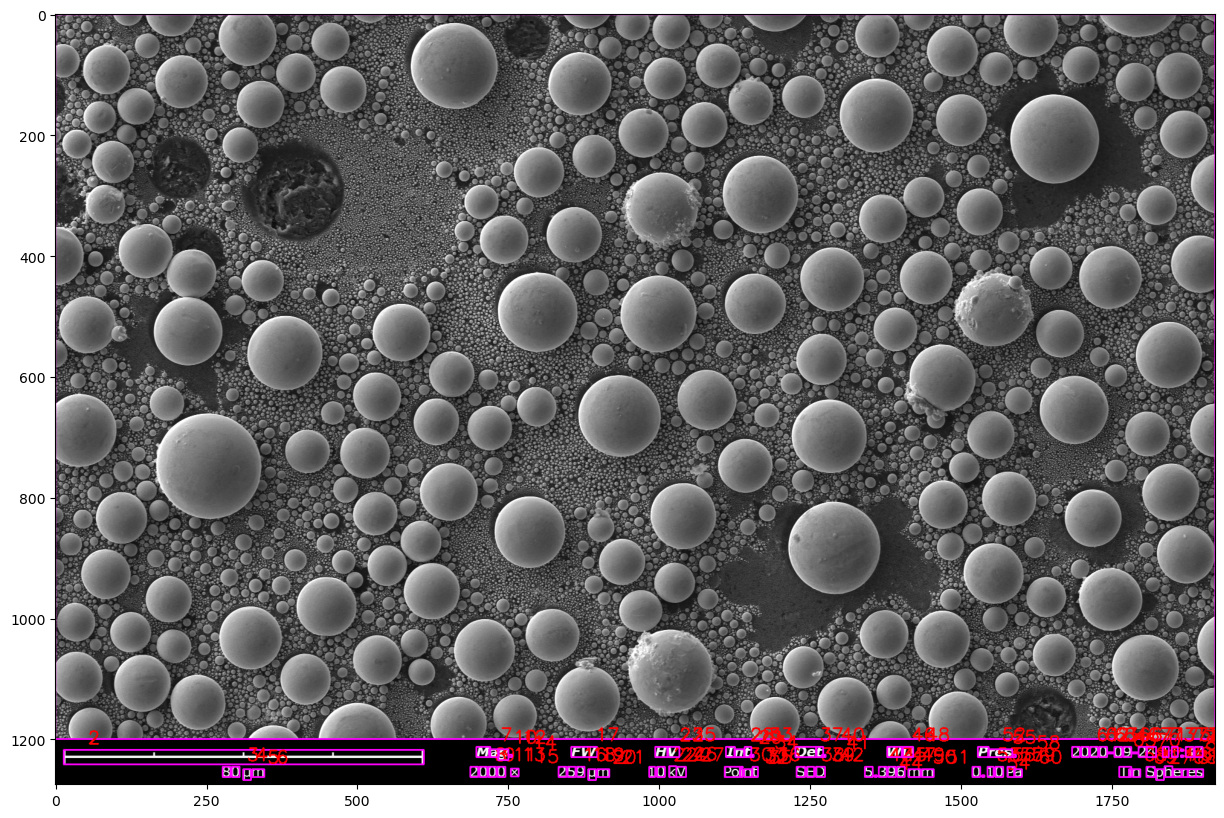

In [2]:

imageCopy = cv2.imread("./images/test.png")
imageGray = cv2.imread("./images/test.png", 0)
image = imageCopy.copy()

contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, 
                                           cv2.CHAIN_APPROX_SIMPLE)
bboxes = [cv2.boundingRect(i) for i in contours]
bboxes=sorted(bboxes, key=lambda x: x[0])

df=pd.DataFrame(bboxes, columns=['x','y','w', 'h'], dtype=int)
df["x2"] = df["x"]+df["w"] # adding column for x on the right side
df = df.sort_values(["x","y", "x2"]) # sorting

for i in range(2): # change rows between each other by their coordinates several times 
# to sort them completely 
    for ind in range(len(df)-1):
    #     print(ind, df.iloc[ind][4] > df.iloc[ind+1][0])
        if df.iloc[ind][4] > df.iloc[ind+1][0] and df.iloc[ind][1]> df.iloc[ind+1][1]:
            df.iloc[ind], df.iloc[ind+1] = df.iloc[ind+1].copy(), df.iloc[ind].copy()
num=0
for box in df.values.tolist():

    x,y,w,h, hy = box
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,255), 2)
    # Mark the contour number
    cv2.putText(image, "{}".format(num + 1), (x+40, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                (0, 0, 255), 2);
    num+=1
plt.imshow(image[:,:,::-1])